### Modeles Stochastiques en Finance MAP 552
#### Computer Problem Set 1.2 
#### Simulation of the Brownian motion
##### GNABEYEU MBIADA Emmanuel

The present problem set is attached to Chapter 4 of the lectures notes.
All implementations should be run with the value T = 1. 
For a positive integer n, we denote $∆T:= 2^{−n}T$, $t^{n}_{i} : = i∆T$,  i= 0,...,$2^{n}$.
Our objective is to simulate a discretization of a Brownian motion W, and to study some properties.

#### 1. Forward simulation of {${W_{t^n_1} , . . . , W_{t^n_n} }$}. 

(a) Justify that $W_{t^n_i} = W_{t^n_{i-1}} + Z_i \sqrt{∆T}$ where $(Z_i )_{1≤i≤2^n} $ is an iid family of $\mathcal{N}(0, 1)$ random variables.

By definition of a browmian motion, the discretized increments are independents and the distribution of $W_{t^n_i} - W_{t^n_{i-1}} $ is $\mathcal{N}(0,\,t^n_i-t^n_{i-1})$. But $t^n_i-t^n_{i-1} = ∆T$ , then $W_{t^n_i} - W_{t^n_{i-1}} \sim \mathcal{N}(0,\,t^n_i-t^n_{i-1}) \sim \mathcal{N}(0,\,∆T) \sim \sqrt{∆T}\mathcal{N}(0, 1) $

Thus, $W_{t^n_i} = W_{t^n_{i-1}} + Z_i \sqrt{∆T}$ where $(Z_i )_{1≤i≤2^n} $ is an iid family of $\mathcal{N}(0, 1)$ random variables.

(b) Draw a sample of 1000 copies of the discretized Brownian motion {$W_{t^n_1} , . . . , W_{t^n_n}$}. 

In [15]:
import numpy as np
import matplotlib.pyplot as plt
n=10
T=1
times = np.linspace(0,T,2**n+1)
dt=times[1]-times[0]

#### A single browmian motion

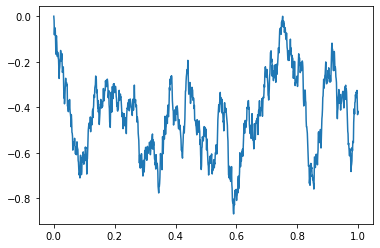

In [16]:
def single_simul_forward(n):
    dB= np.sqrt(dt) * np.random.normal(size=(2**n,))
    B0= np.zeros(shape=(1,))
    B=np.concatenate((B0, np.cumsum(dB)))
    return B
B=single_simul_forward(n)
plt.plot(times,B)
plt.show()

#### increase the number of samples
##### 1000 copies of the discretized Brownian motion

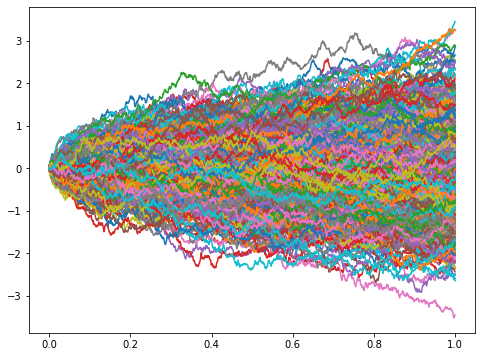

In [17]:
n=10
d=1000
def forward_simul_sample(d):
    # increments
    dB= np.sqrt(dt) * np.random.normal(size=(2**n,d))
    B0= np.zeros(shape=(1,d))
    B=np.concatenate((B0, np.cumsum(dB, axis=0)), axis=0)
    return B
B=forward_simul_sample(d)
plt.figure(figsize=(8,6))
plt.plot(times,B)
plt.show()

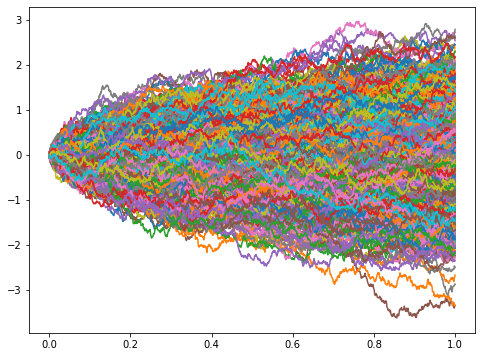

In [18]:
d=1000
# increments
dB= np.sqrt(dt) * np.random.normal(size=(2**n,d))
B0= np.zeros(shape=(1,d))
B=np.concatenate((B0, np.cumsum(dB, axis=0)), axis=0)
plt.figure(figsize=(8,6))
plt.plot(times,B)
plt.show()

(c) Compute the corresponding sample mean and variance of $W_T$ , and the sample covariance of $(W_T , W_{T/2})$.
Comment the results by varying the value of n.

In [19]:
N=len(times)
mean=np.mean(B, axis=1)
var=np.var(B, axis=1)
# covariance of (WT,WT/2)
cov=np.cov(B[-1,:],B[int(0.5*N),:])
print("Mean of W_T :",mean[-1])
print("variance of W_T :",var[-1])

Mean of W_T : -0.022675984521179637
variance of W_T : 0.9556278534827595


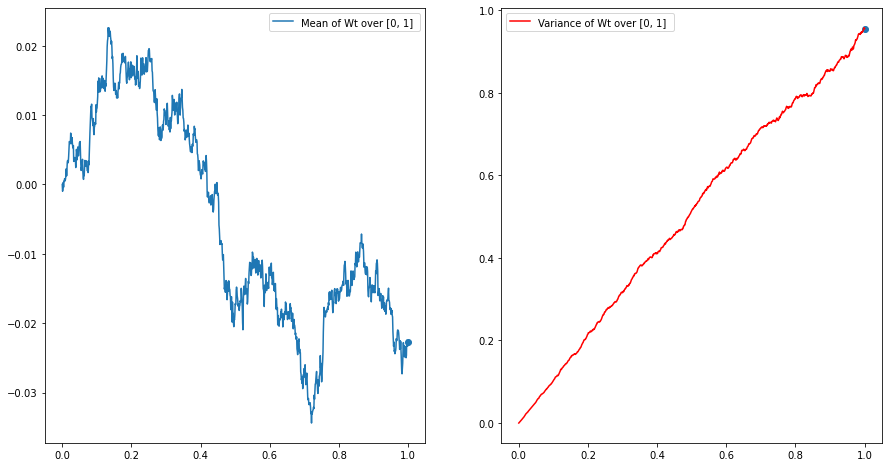

In [22]:
plt.figure(figsize=(15,8))
#plot 1: Mean
plt.subplot(1, 2, 1)
plt.plot(times,mean,label="Mean of Wt over [0, 1] ")
plt.scatter(times[-1],mean[-1])
plt.legend()
#plot 2: variance

plt.subplot(1, 2, 2)
plt.plot(times,var,label="Variance of Wt over [0, 1] ",c='r')
plt.scatter(times[-1],var[-1])
plt.legend()

plt.show()

In [23]:
cov

array([[0.95658444, 0.50669131],
       [0.50669131, 0.51518188]])

In [24]:
# vary the number of n
n=12
d=1000
# increments
dB= np.sqrt(dt) * np.random.normal(size=(2**n-1,d))
B0= np.zeros(shape=(1,d))
B=np.concatenate((B0, np.cumsum(dB, axis=0)), axis=0)

times = np.linspace(0,T,2**n+1)
N=len(times)
mean=np.mean(B, axis=1)
var=np.var(B, axis=1)
cov=np.cov(B[-1,:],B[int(0.5*N),:])
print("Mean of $ W_T $ :",mean[-1])
print(var[-1])
print(cov)

Mean of $ W_T $ : -0.18618151524492366
4.078107193037017
[[4.08218938 2.07672823]
 [2.07672823 2.0384891 ]]


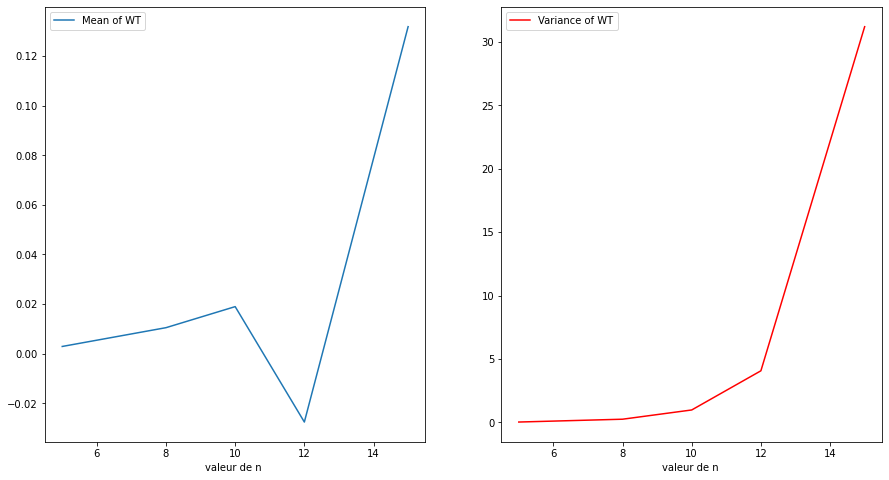

In [30]:
m=[]
v=[]
cv=[]
nter=[5,8,10,12,15]
for n in nter:
    # increments
    dB= np.sqrt(dt) * np.random.normal(size=(2**n-1,d))
    B0= np.zeros(shape=(1,d))
    B=np.concatenate((B0, np.cumsum(dB, axis=0)), axis=0)
    times = np.linspace(0,T,2**n+1)
    N=len(times)
    mean=np.mean(B, axis=1)
    var=np.var(B, axis=1)
    cov=np.cov(B[-1,:],B[int(0.5*N),:])
    m.append(mean[-1])
    v.append(var[-1])
    cv.append(cov[1,0])
    
plt.figure(figsize=(15,8))
#plot 1: Mean
plt.subplot(1, 2, 1)
plt.plot(nter,m,label="Mean of WT")
plt.xlabel('valeur de n ')
plt.legend()
#plot 2: variance

plt.subplot(1, 2, 2)
plt.plot(nter,v,label="Variance of WT",c='r')
plt.xlabel('valeur de n ')
plt.legend()

plt.show()

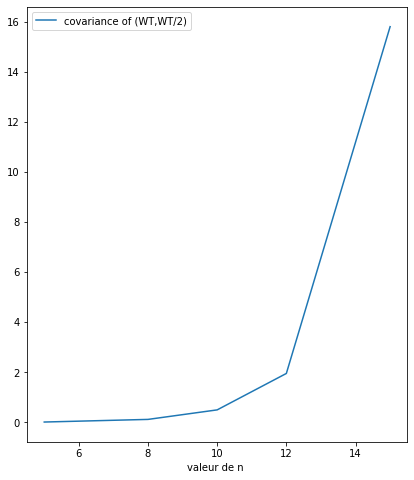

In [32]:
plt.figure(figsize=(15,8))
#plot 1: Mean
plt.subplot(1, 2, 1)
plt.plot(nter,cv,label="covariance of (WT,WT/2)")
plt.xlabel('valeur de n ')
plt.legend()

***comments:*** We can observe from these figures that the variance of $W_T$ and the covariance of $(W_T,W_{T/2})$ increase with the discretization n

##### 2. Backward simulation of  {${W_{t^n_1} , . . . , W_{t^n_n} }$}.

With $ \bar{s}:=s_1+s_2$,justify that $W_{\bar{s}}|(W_{s_1} =x_1,W_{s_2} =x_2)$ has a Gaussian distribution with conditional mean $\bar{x} := x_1+x_2$ and conditional variance of $\frac{s_2-s_1}{4}$

As W is a browmian motion, we then know that $(W_{s_1},W_{\bar{s}},W_{s_2})$ is a centered gaussian vector, with variance matrix $ \left(\begin{array}{cc} s_1 & s_1 &s_1 \\ s_1 & {\bar{s}} &{\bar{s}}\\
s_1&{\bar{s}} & s_2 \end{array}\right) $ so the conditional random variable $W_{\bar{s}}|(W_{s_1},W_{s_2})$ has a gaussian distribution and $ \mathbb{E}[W_{\bar{s}}|(W_{s_1},W_{s_2})]$ coincide with the projection of $W_{\bar{s}}$ over the sub-vector space generated by $(W_{s_1} ,W_{s_2} )$.
Thus, $ \mathbb{E}[W_{\bar{s}}|(W_{s_1},W_{s_2})]$  is a linear combination of  $W_{s_1}$ and $W_{s_2} $ .

Proposition: Supposons que Z =(X,Y) soit un vecteur gaussien, de matrice de covariance $Σ_Z$ se décomposant de la facon suivante: $Σ_Z = \left(\begin{array}{cc} Σ_X & Σ_0\\
Σ_0^T & Σ_Y \end{array}\right) $
supposons en plus que la matrice de covariance $Σ_X$ de X est definie positive. Soit x ∈ $R^{n_X}$.
La loi conditionnelle de Y sachant X = x est alors une loi gausienne
d’esperance $\mathbb{E}(Y|X = x) = \mathbb{E}(Y) + Σ_0^TΣ^{−1}_X
(x − \mathbb{E}(X)) $ et de matrice de covariance
$Σ^Y_{X=x}= Σ_Y − Σ_0^TΣ^{−1}_XΣ_0.$

Remarque : on retrouve bien que $\mathbb{E} (Y|X)$ est une v.a. gausienne
$\mathbb{E} (Y|X) = \mathbb{E}(Y) + Σ_0^TΣ^{−1}_X(X − \mathbb{E}(X)).$

Applying this proposition, for Y=$W_{\bar{s}}$ and X=$(W_{s_1},W_{s_2})$, we have:
$ \mathbb{E}[W_{\bar{s}}|(W_{s_1}=x_1,W_{s_2}=x_2)] = \mathbb{E}(W_{\bar{s}}) + Σ_0^TΣ^{−1}_{(W_{s_1},W_{s_2})}
(\left(\begin{array}{cc} x_1\\x_2 \end{array}\right)  − \left(\begin{array}{cc} 0\\0 \end{array}\right))
= 0 + \left(\begin{array}{cc} s_1\\ \bar{s} \end{array}\right)^T\left(\begin{array}{cc} s_1 & s_1\\
s_1 & s_2 \end{array}\right)^{−1}
(\left(\begin{array}{cc} x_1\\x_2 \end{array}\right)  − \left(\begin{array}{cc} 0\\0 \end{array}\right))
= \frac{x_1+x_2}{2}$

$ Σ^Y_{X=x}= Σ_Y − Σ_0^TΣ^{−1}_XΣ_0$
$= \bar{s} - \left(\begin{array}{cc} s_1\\ \bar{s} \end{array}\right)^T \left(\begin{array}{cc} s_1 & s_1\\
s_1 & s_2 \end{array}\right)^{−1} \left(\begin{array}{cc} s_1\\ \bar{s} \end{array}\right) $
=$\frac{s_2-s_1}{4}$

(b) Justify that the conditional distribution $of W_{\bar{x}}|(W_{s_1}=x_1, W_{s_1}=x_2,(W_u)_{u∈/[s_1 ,s_2]} )$ is $\mathcal{N}(\bar{x}, \frac{s_2-s_1}{4})$ 

By the independance of increments and the growing of the canonical filtration in which the brownian motion is define, $ W_{\bar{x}}|(W_{s_1}=x_1, W_{s_1}=x_2,(W_u)_{u∈/[s_1 ,s_2]} )$ has the same law as $W_{\bar{s}}|(W_{s_1} =x_1,W_{s_2} =x_2)$ which is $\mathcal{N}(\bar{x}, \frac{s_2-s_1}{4})$  as shown is the question (b)

Thus, knowing $W_{s_1} (W_{s_1}=x_1)$ imply knowing the values of $W_u$ for $u < s_1 $ by the definition of the brownian motion and the filtration and then conditioning with respect to $W_u$ is equivalent to conditionning with respect to $W_{s_1}$.
Moreover, if $u > s_2 $, by the continuity of the brownian motion and the intermediate value theorem, $W_{\bar{s}}$ is known as soon as  $W_{\bar{s}}=x_2$ is already known.
Then, conditionning with respect to $W_u$ is redundancy of information, it comes out that $ W_{\bar{x}}|(W_{s_1}=x_1, W_{s_1}=x_2,(W_u)_{u∈/[s_1 ,s_2]} )$ has the same law as $W_{\bar{s}}|(W_{s_1} =x_1,W_{s_2} =x_2)$

(c) Use the last property to simulate backward the discretized Brownian motion:

In [33]:
## single simulation

def backward_simulation(n):
    times = np.linspace(0,T,2**n+1)
    # increments
    WT= np.random.normal(size=(1,))
    W0= np.zeros(shape=(1,))
    B=np.concatenate((W0, WT))
    for i in range(1,n+1):
        for j in range(B.shape[0]-1):
            W= (B[j]+B[j+1])/2 + 0.5*np.sqrt(1/2**i)*np.random.normal(size=(1,))
            A=np.concatenate((B[:j+1],W))
            B=np.concatenate((A,B[j+1:]))
            j=j+2
    return times,B
    

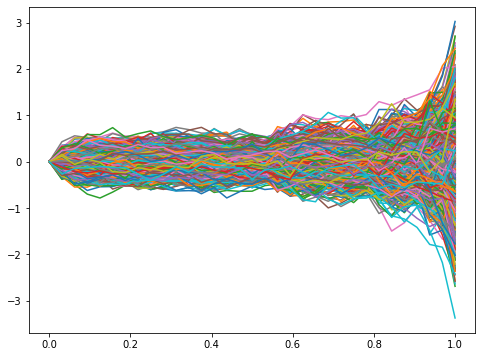

In [34]:
### 1000 simulations
d=1000
n=5
times, BM=backward_simulation(n)
BM=BM.reshape(-1,1)
for i in range(d-1):
    times, B=backward_simulation(n)
    BM=np.concatenate((BM,B.reshape(-1,1)), axis=1)
    
plt.figure(figsize=(8,6))
plt.plot(times,BM)
plt.show()

##### Direct method by matrix, 1000 simulations:

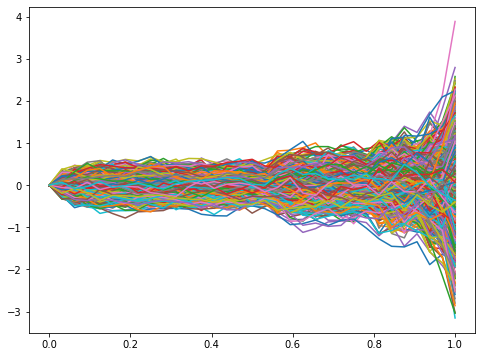

In [38]:
n=5
d=1000
times = np.linspace(0,T,2**n+1)
# increments
WT= np.random.normal(size=(1,d))
W0= np.zeros(shape=(1,d))
B=np.concatenate((W0, WT),axis=0)
for i in range(1,n+1):
    for j in range(B.shape[0]-1):
        # cov = np.cov(B[j],B[j+1])
        W= (B[j]+B[j+1])/2 + 0.5*np.sqrt(1/2**i)*np.random.normal(size=(1,d))
        A=np.concatenate((B[:j+1,:],W), axis=0)
        B=np.concatenate((A,B[j+1:,:]), axis=0)
        j=j+2
plt.figure(figsize=(8,6))
plt.plot(times,B)
plt.show()

(d) Compute the corresponding sample mean and variance of $W_T$ , and the sample covariance of $(W_T , W_{T /2} )$. Comment the results by varying the value of n.

In [39]:
N=len(times)
mean=np.mean(BM, axis=1)
var=np.var(BM, axis=1)
# covariance of (WT,WT/2)
cov=np.cov(BM[-1,:],BM[int(0.5*N),:])
print("Mean of W_T :",mean[-1])
print("variance of W_T :",var[-1])

Mean of W_T : 0.0007986008950737116
variance of W_T : 0.9618597706057349


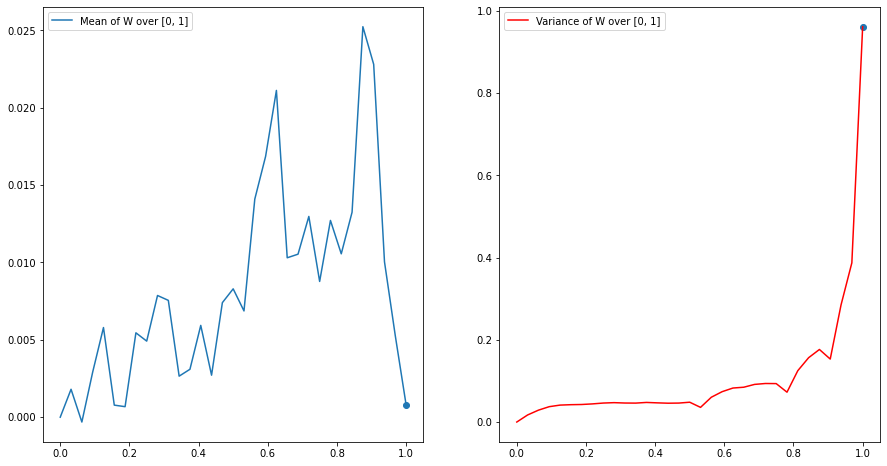

In [40]:
plt.figure(figsize=(15,8))
#plot 1: Mean
plt.subplot(1, 2, 1)
plt.plot(times,mean,label="Mean of W over [0, 1]")
plt.scatter(times[-1],mean[-1])
plt.legend()
#plot 2: variance

plt.subplot(1, 2, 2)
plt.plot(times,var,label="Variance of W over [0, 1]",c='r')
plt.scatter(times[-1],var[-1])
plt.legend()

plt.show()

##### Let's vary the number of n

In [41]:
def backward_simul_sample(d):
    times, BM=backward_simulation(n)
    BM=BM.reshape(-1,1)
    for i in range(d-1):
        times, B=backward_simulation(n)
        BM=np.concatenate((BM,B.reshape(-1,1)), axis=1)
    return times,BM

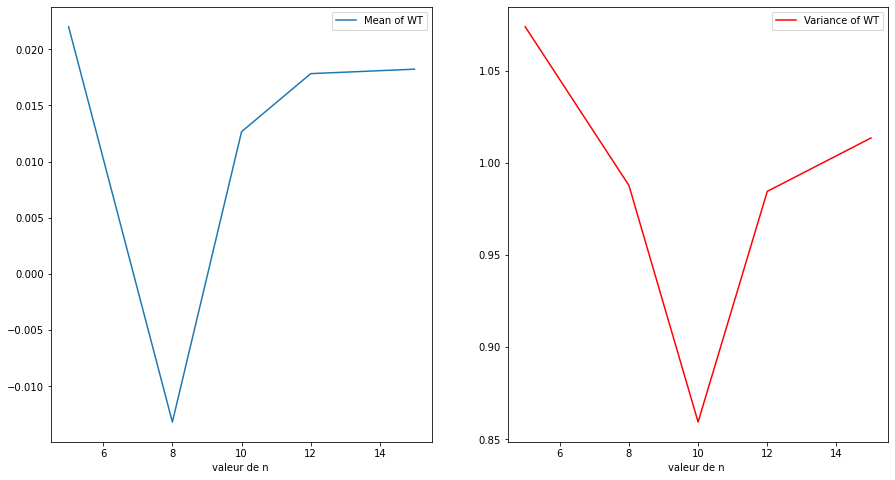

In [81]:
d=1000
m=[]
v=[]
cv=[]
nter=[5,8,10,12,15]
for n in nter:
    times,B= backward_simul_sample(d)
    times = np.linspace(0,T,2**n+1)
    N=len(times)
    mean=np.mean(B, axis=1)
    var=np.var(B, axis=1)
    cov=np.cov(B[-1,:],B[int(0.5*N),:])
    m.append(mean[-1])
    v.append(var[-1])
    cv.append(cov[1,0])
    
plt.figure(figsize=(15,8))
#plot 1: Mean
plt.subplot(1, 2, 1)
plt.plot(nter,m,label="Mean of WT")
plt.xlabel('valeur de n ')
plt.legend()
#plot 2: variance

plt.subplot(1, 2, 2)
plt.plot(nter,v,label="Variance of WT",c='r')
plt.xlabel('valeur de n ')
plt.legend()

plt.show()

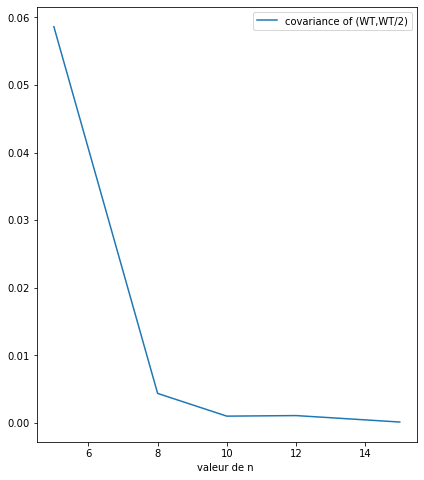

In [80]:
plt.figure(figsize=(15,8))
#plot 1: Mean
plt.subplot(1, 2, 1)
plt.plot(nter,cv,label="covariance of (WT,WT/2)")
plt.xlabel('valeur de n ')
plt.legend()

***comments:*** We can observe from these figures that the covariance of $(W_T,W_{T/2})$ decrease with the discretization n

#### 3. Using successively the forward and backward simulated samples, compute an approximation of $QV^n(W)_T$, the quadratic variation of the Brownian motion along the partition $(t_{n_i} )_i$.

In [49]:
def quadratic_variation(B):
    return np.cumsum(np.power(np.diff(B, axis=0,prepend=0.),2),axis=0)

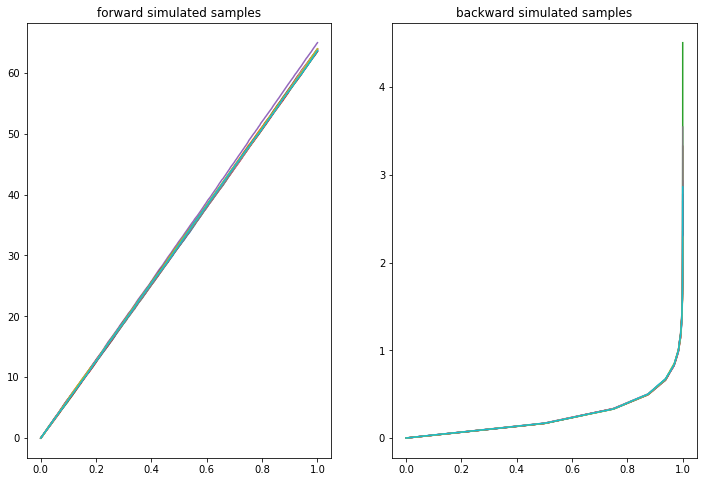

In [50]:
d=10
nter=[16]
for n in nter:
    times,BM=backward_simul_sample(d)
    B= forward_simul_sample(d)
    
    plt.figure(figsize=(12,8))
    plt.subplot(1, 2, 1)
    plt.plot(times,quadratic_variation(B))
    plt.title("forward simulated samples")

    plt.subplot(1, 2, 2)
    plt.plot(times,quadratic_variation(BM))
    plt.title("backward simulated samples")
    
    plt.show()

##### As a function of n,displaying the departure from the limit T we then have:

In [70]:
def quadratic_variation2(B):
    return np.sum(np.power(np.diff(B,prepend=0.),2))

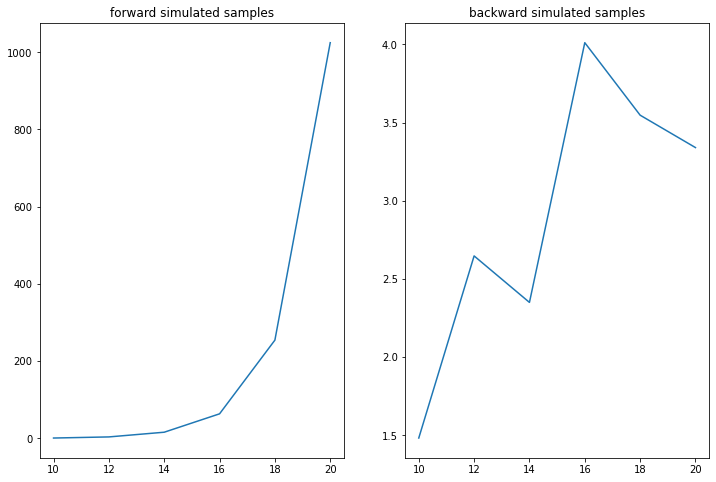

In [78]:
d=1
nter=[10,12,14,16,18,20]
QV_for=[]
QV_back=[]
for n in nter:
    times,BM=backward_simulation(n)
    B=single_simul_forward(n)
    QV_for.append(quadratic_variation2(B))
    QV_back.append(quadratic_variation2(BM))
    
plt.figure(figsize=(12,8))
plt.subplot(1, 2, 1)
plt.plot(nter,QV_for)
plt.title("forward simulated samples")

plt.subplot(1, 2, 2)
plt.plot(nter,QV_back)
plt.title("backward simulated samples")
    
plt.show()